In [7]:
import tifffile as tiff
import matplotlib.pyplot as plt
import GRAPES as gp
import pandas as pd

### GRAPES Toolkit - Example 1
In this notebook we use the GRAPES toolkit to analyse a dataset of three cracked particles imaged with X-ray Computed Tomography (XCT). We look at how to calculate a pandas dataframe of particles and particle characteristics, perform some analysis, plotting, and visualisation.

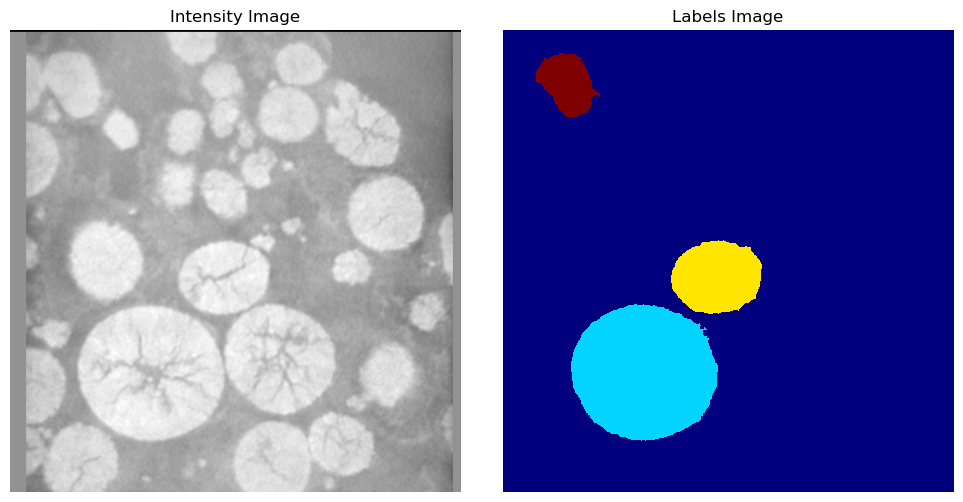

In [6]:
# Load images
intensity_image = tiff.imread('example_image.tif')
labels_image = tiff.imread('example_labels.tif')

# Plot Images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(intensity_image[80], cmap='gray')
plt.title('Intensity Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(labels_image[80], cmap='jet', interpolation = 'none')
plt.title('Labels Image')
plt.axis('off')
plt.tight_layout()
plt.show()

Above we have plotted an intensity image slice of the cracked particle from the XCT image, and a corresponding labels segmentation showing the three particles we will analyse.

In [9]:
# Create a GRAPES table
particle_df = gp.GRAPES(labels_image, intensity_image)


In [12]:
help(gp.GRAPES)

Help on function GRAPES in module GRAPES:

GRAPES(labels_arr: numpy.ndarray, grey_arr: numpy.ndarray, normalised_by: str = 'radial_max', start_at: str = 'edge', pixel_size: Union[float, NoneType] = None, fill_label_holes: bool = False, min_hole_size: int = 5000, anisotropy: Tuple[float, ...] = (1.0, 1.0, 1.0), order: str = 'C', black_border: bool = True, parallel: int = 1, n_jobs: int = -1) -> pandas.core.frame.DataFrame
    Graylevel Analysis of Particles in ElectrodeS (GRAPES) uses the GREAT2 algorithm to analyze the graylevel at different radial layers
    inside the particles of electrodes. Used to identify changes in density due to degradation of electrode particles.
    Reduces data to pd.DataFrame of particle labels and properties.
    
    Args:
        labels_arr (ndarray): Array of labeled regions where each unique region is a particle to be analyzed.
        grey_arr (ndarray): Graylevel array corresponding to labeled image.
        normalised_by (str, optional): Normalizati

In [10]:
particle_df.head()

,label,volume,centroid-0,centroid-1,centroid-2,centroid_local-0,centroid_local-1,centroid_local-2,equivalent_diameter_volume,intensity_max,intensity_mean,intensity_min,image,image_intensity,sphericity,radial_layers,radial_layers_graylevel,radial_layers_graylevelnormed,radial_layers_dt
0,1,1971115.0,79.386373,379.136597,155.416274,78.386373,76.136597,80.416274,155.562333,249.0,212.778108,147.0,"[[[False, False, False, False, False, False, F...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",76025.409207,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[196.86536, 207.39848, 212.32298, 214.59866, 2...","[0.0, 0.5293554, 0.77684224, 0.89120936, 0.947...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
1,2,478519.0,84.950575,273.594413,238.703765,59.950575,45.594413,54.703765,97.043590,243.0,213.100500,160.0,"[[[False, False, False, False, False, False, F...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",29585.818056,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[196.86128, 208.35748, 213.80685, 216.2506, 21...","[0.0, 0.5605383, 0.8262418, 0.9453951, 0.98151...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
2,3,109504.0,78.438523,59.861256,71.575029,26.438523,33.861256,35.575029,59.357708,219.0,197.659665,177.0,"[[[False, False, False, False, False, False, F...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",11068.891069,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[190.47316, 195.91362, 198.09984, 199.11218, 1...","[0.0, 0.56939405, 0.7982018, 0.9041529, 0.9831...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."


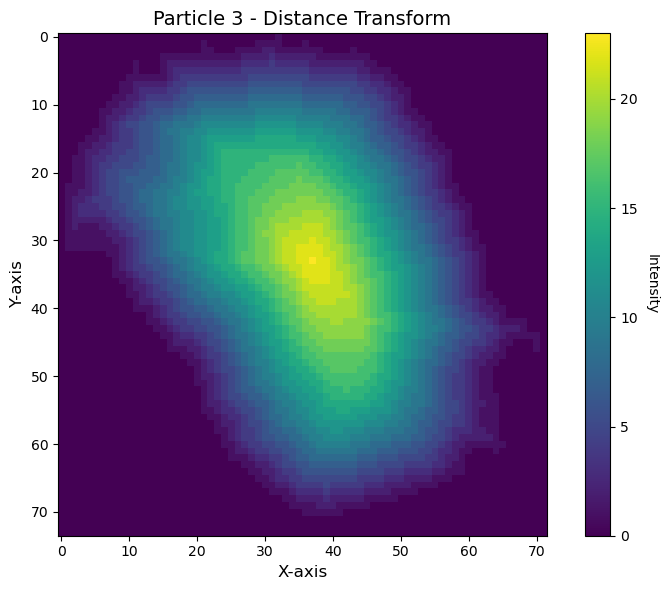

In [20]:
# Plot radial layers as an image
plot = gp.plot_particle_image(particle_df, label = 3, image_type = 'distance_transform')

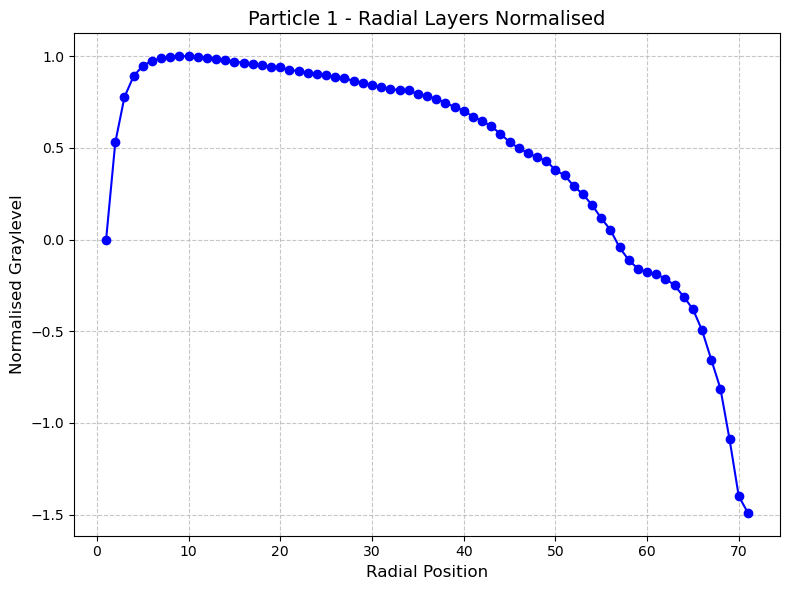

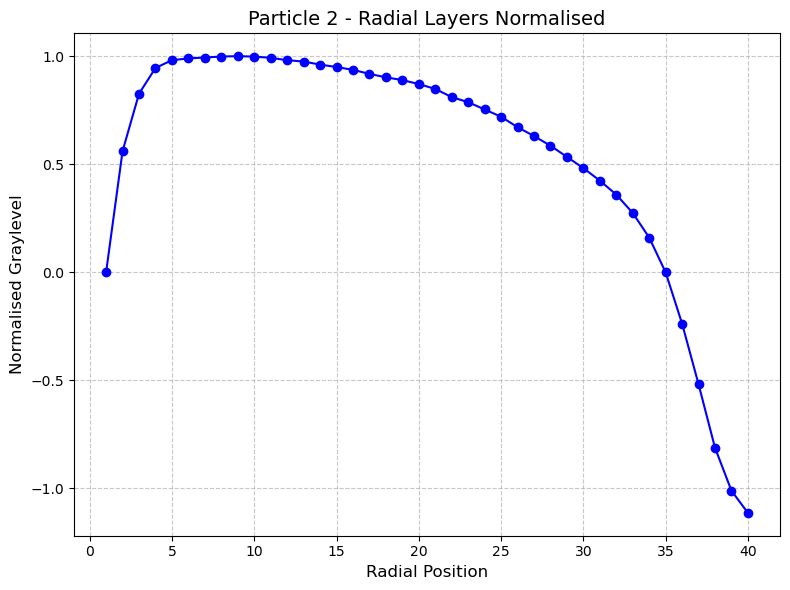

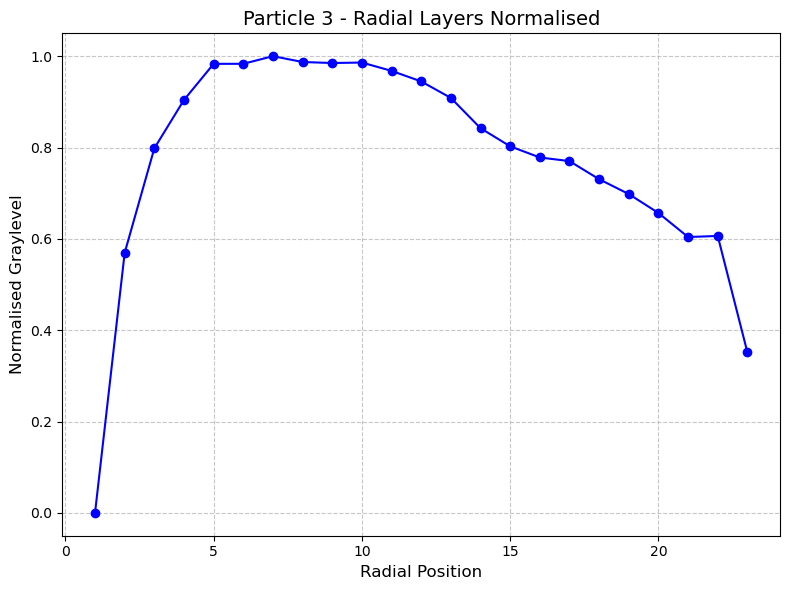

In [11]:
# Plot radial intensity profiles
for i in particle_df['label']:
    gp.plot_radial_intensities(particle_df, i)

In each particle we observe a drop in grey-level towrds the center of the particle, justing high crack and void formation in the central regions.

d:\nano_ct_GRAPES\github_example\GRAPES.py:1142: UserWarning: The following labels in the image are not present in the dataframe and will be assigned 0: [0]
  warnings.warn(f"The following labels in the image are not present in the dataframe and will be assigned 0: {labels_not_in_mapping}")
d:\nano_ct_GRAPES\github_example\GRAPES.py:1213: UserWarning: 'slice_idx' not provided. Using central slice index 82.
  warnings.warn(f"'slice_idx' not provided. Using central slice index {slice_idx}.")


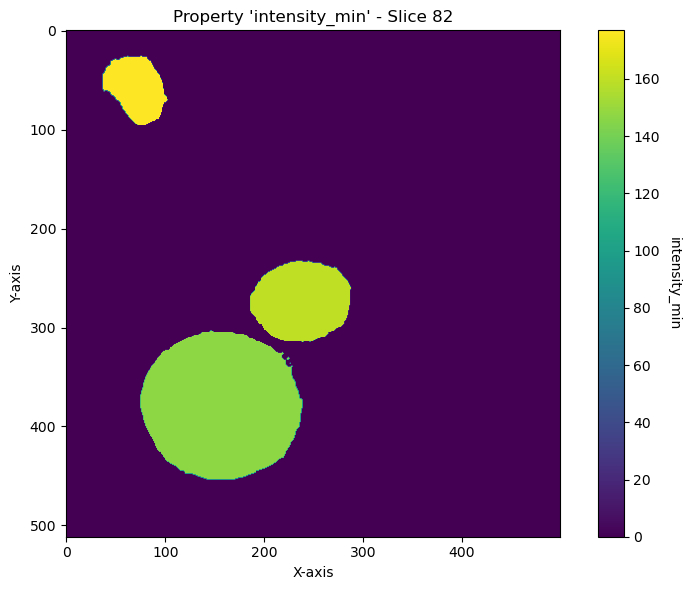

In [19]:
# We can also plot particle properties in the image space by using the `plot_particle_properties` function
min_i_arr = gp.prop_2_image(labels_image, particle_df, prop = 'intensity_min')